In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# credit card Fraud Detection
# Veri seti:
* Bu proje : kredi kartının kullaıldığı her yerde bulunan kredi kartı dolandırıcılık tespiti yapılmasını amaçlamaktadır.BAnkalarda,e-commerce(e ticaret siteleri),ve kredi kartının geçtiği her yerde karşımıza çıkabilir.
* amaç :kredi kartı dolandırıclık tespiti yaparak tahminde bulunmak ve tespit etmektir.
* sınıflandırma projesidir.machine learning kullanılacaktır.
* v1 -v29 feature değişkenleri standardlaştırlımış.
* işem yapılan yer, lokasyon,site gibi değerler bunlar gizlenmiştir.
* bizden beklenen bu v columnlarından önemli olanları bulup frauda sebep verenleri bulmaktır.

In [7]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [8]:
df #id column primary keydir v1-v29 columlartı gizlenmiş feature dır.yani bunlar müşteriye ait herhangi bir özelliktir.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# amount=ücret miktarıdır. class 1 ise sahtekarlık vardır. 0 ise yoktur demektir.

In [10]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
print(f"%{df.Class.value_counts()[0]/len(df) *100} fraud olmayan")
print(f"%{df.Class.value_counts()[1]/len(df)*100} fraud")

%99.82725143693798 fraud olmayan
%0.1727485630620034 fraud


In [12]:
df.isnull().sum().max()

0

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: xlabel='Class', ylabel='count'>

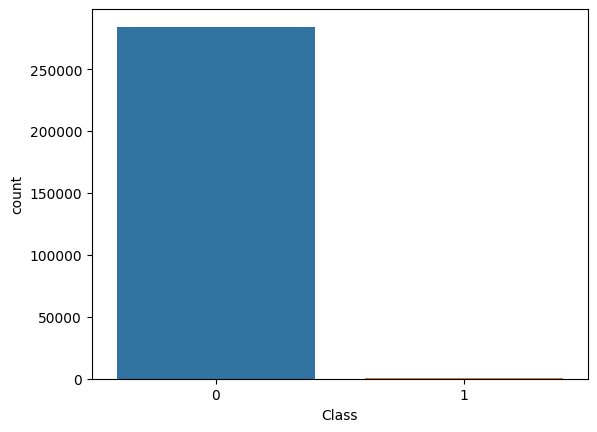

In [14]:
sns.countplot(df,x="Class") #hemen hemen 1/0 eşit gibi görünüyor.

In [ ]:
df.describe()

In [15]:
#we see that we have sclaed feature but we have to scale all feature (Time ,Amount) to create model.We have used Robust
#scaler because this choice more resilince for outlier values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.Time = scaler.fit_transform(df.Time.values.reshape(-1,1))
df.Amount = scaler.fit_transform(df.Amount.values.reshape(-1,1))

In [16]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


# undersample

<Axes: xlabel='Class', ylabel='count'>

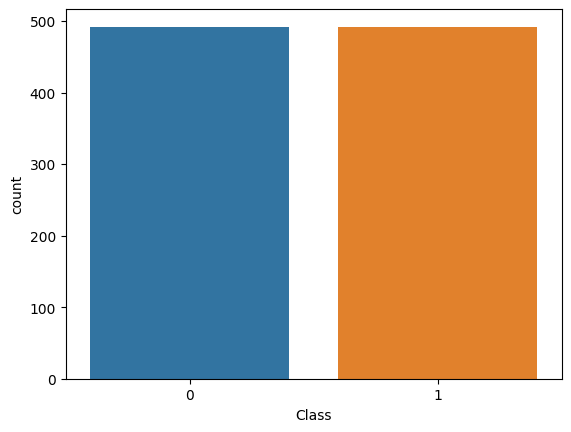

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

Xtrain, Xtest, ytrain,  ytest = train_test_split(X, y, test_size=0.2, random_state=818)

df = df.sample(frac=1)
fraud = df.loc[df.Class == 1]
non_fraud = df.loc[df.Class == 0][:492]

distributed_df = pd.concat([fraud, non_fraud])

new_df = distributed_df.sample(frac=1, random_state=818)

new_df.head()

sns.countplot(new_df,x="Class")

<Axes: >

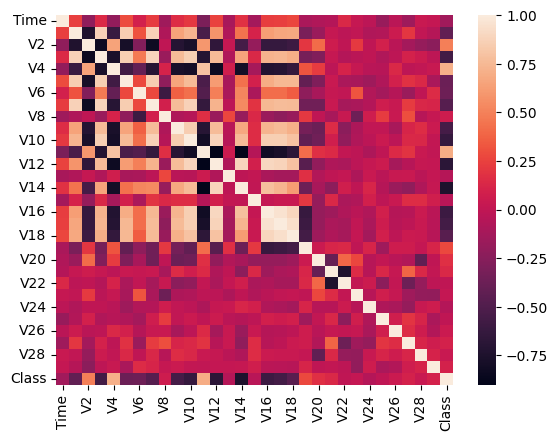

In [18]:
relationship = new_df.corr()
sns.heatmap(relationship)

* 16-17-18 features have high relationship eventually that can be more re

In [ ]:
from scipy.stats import norm
new_df['V14'].loc[new_df['Class'] == 1].values
new_df['V12'].loc[new_df['Class'] == 1].values
new_df['V17'].loc[new_df['Class'] == 1].values
new_df['V18'].loc[new_df['Class'] == 1].values

<Axes: title={'center': 'v4 class comparisons'}, xlabel='Class', ylabel='V4'>

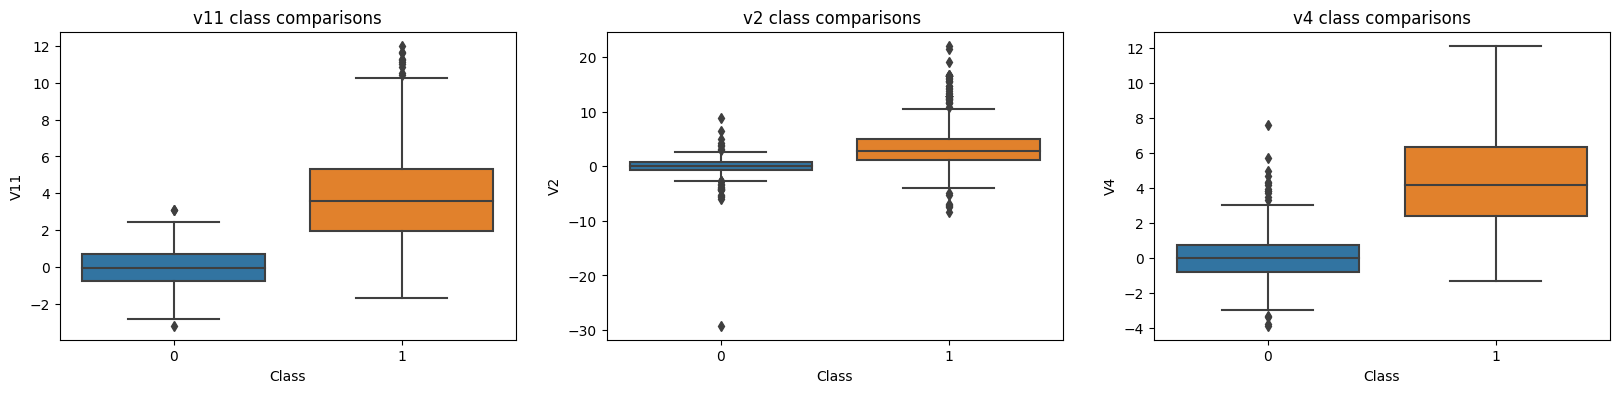

In [20]:
fig, axes = plt.subplots(1,3 ,figsize=(20,4))
axes[0].set_title("v11 class comparisons")
axes[1].set_title("v2 class comparisons ")
axes[2].set_title("v4 class comparisons")
sns.boxplot(x="Class", y="V11", data=new_df,   ax=axes[0])
sns.boxplot(x="Class", y="V2", data=new_df,   ax=axes[1])
sns.boxplot(x="Class", y="V4", data=new_df,   ax=axes[2])

<Axes: >

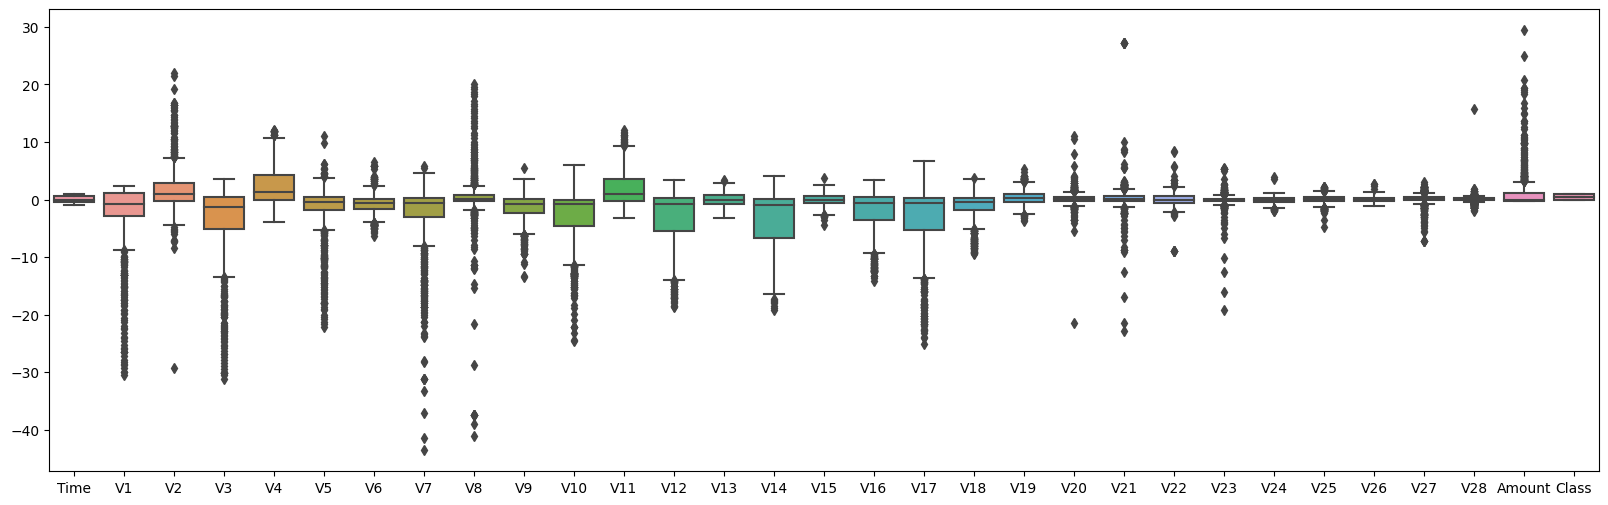

In [21]:
plt.figure(figsize=(20,6))
sns.boxplot(data = new_df)

# Outlier for undersample technique

In [22]:
def outlier_zscore(data,threshold = 3):
    global outliers,zscore
    outliers = []
    zscore = []
    
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    cleaned_data = [x for x in data if x not in outliers]
    
    print("Total number of outliers are", len(outliers))
    
    return cleaned_data

In [23]:
for i in df.columns:
    print (i)
    outlier_zscore(new_df[i])

Time
Total number of outliers are 0
V1
Total number of outliers are 30
V2
Total number of outliers are 23
V3
Total number of outliers are 32
V4
Total number of outliers are 5
V5
Total number of outliers are 33
V6
Total number of outliers are 11
V7
Total number of outliers are 19
V8
Total number of outliers are 24
V9
Total number of outliers are 17
V10
Total number of outliers are 15
V11
Total number of outliers are 11
V12
Total number of outliers are 13
V13
Total number of outliers are 2
V14
Total number of outliers are 7
V15
Total number of outliers are 4
V16
Total number of outliers are 8
V17
Total number of outliers are 16
V18
Total number of outliers are 16
V19
Total number of outliers are 4
V20
Total number of outliers are 9
V21
Total number of outliers are 18
V22
Total number of outliers are 11
V23
Total number of outliers are 18
V24
Total number of outliers are 5
V25
Total number of outliers are 10
V26
Total number of outliers are 4
V27
Total number of outliers are 20
V28
Total 

In [24]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

def z_score_method(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []
    
    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        
        z_score = abs( (df[column] - data_mean)/data_std )
     
        outlier_list_column =  df[z_score > threshold].index
        
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])
    
    return multiple_outliers
# detecting outliers
#Outliers_z_score = z_score_method(new_df,1,feature_list)

# dropping outliers
#new_df = new_df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

def outlier_thresholds(dataframe, col_names, q1=0.25, q3=0.75):
    limits = {}
    for col_name in col_names:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        limits[col_name] = (low_limit, up_limit)
    return limits

def detect_and_replace_outliers(dataframe, col_names, q1=0.25, q3=0.75):
    limits = outlier_thresholds(dataframe, col_names, q1, q3)
    for col_name in col_names:
        low_limit, up_limit = limits[col_name]
        dataframe_copy = dataframe.copy()  
        outliers = dataframe_copy[(dataframe_copy[col_name] > up_limit) | (dataframe_copy[col_name] < low_limit)]
        if not outliers.empty:
            replace_with_thresholds(dataframe, col_name, low_limit, up_limit)
    return dataframe

def check_outlier(dataframe, col_names, q1=0.25, q3=0.75):
    outlier_dict = {}
    for col_name in col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, [col_name], q1, q3)[col_name]
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            outlier_dict[col_name] = True
        else:
            outlier_dict[col_name] = False
    return outlier_dict

In [25]:
def outlier_thresholds(dataframe, col_names, q1=0.25, q3=0.75):
    limits = {}
    for col_name in col_names:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        limits[col_name] = (low_limit, up_limit)
    return limits

def replace_with_thresholds(dataframe, variable, low_limit, up_limit):
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def replace_outliers(dataframe, col_names, q1=0.25, q3=0.75):
    limits = outlier_thresholds(dataframe, col_names, q1, q3)
    for col_name in col_names:
        low_limit, up_limit = limits[col_name]
        dataframe_copy = dataframe.copy()  # Orjinal veriyi değiştirmemek için bir kopya alıyoruz.
        outliers = dataframe_copy[(dataframe_copy[col_name] > up_limit) | (dataframe_copy[col_name] < low_limit)]
        if not outliers.empty:
            replace_with_thresholds(dataframe, col_name, low_limit, up_limit)
    return dataframe

def check_outlier(dataframe, col_names, q1=0.25, q3=0.75):
    outlier_dict = {}
    for col_name in col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, [col_name], q1, q3)[col_name]
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            outlier_dict[col_name] = True
        else:
            outlier_dict[col_name] = False
    return outlier_dict

In [26]:
check_outlier(new_df,feature_list)

{'V1': True,
 'V2': True,
 'V3': True,
 'V4': True,
 'V5': True,
 'V6': True,
 'V7': True,
 'V8': True,
 'V9': True,
 'V10': True,
 'V11': True,
 'V12': True,
 'V13': True,
 'V14': True,
 'V15': True,
 'V16': True,
 'V17': True,
 'V18': True,
 'V19': True,
 'V20': True,
 'V21': True,
 'V22': True,
 'V23': True,
 'V24': True,
 'V25': True,
 'V26': True,
 'V27': True,
 'V28': True,
 'Amount': True}

In [27]:
new_df = replace_outliers(new_df,feature_list)

In [28]:
check_outlier(new_df,feature_list)

{'V1': False,
 'V2': False,
 'V3': False,
 'V4': False,
 'V5': False,
 'V6': False,
 'V7': False,
 'V8': False,
 'V9': False,
 'V10': False,
 'V11': False,
 'V12': False,
 'V13': False,
 'V14': False,
 'V15': False,
 'V16': False,
 'V17': False,
 'V18': False,
 'V19': False,
 'V20': False,
 'V21': False,
 'V22': False,
 'V23': False,
 'V24': False,
 'V25': False,
 'V26': False,
 'V27': False,
 'V28': False,
 'Amount': False}

<Axes: title={'center': 'v4 class comparisons'}, xlabel='Class', ylabel='V4'>

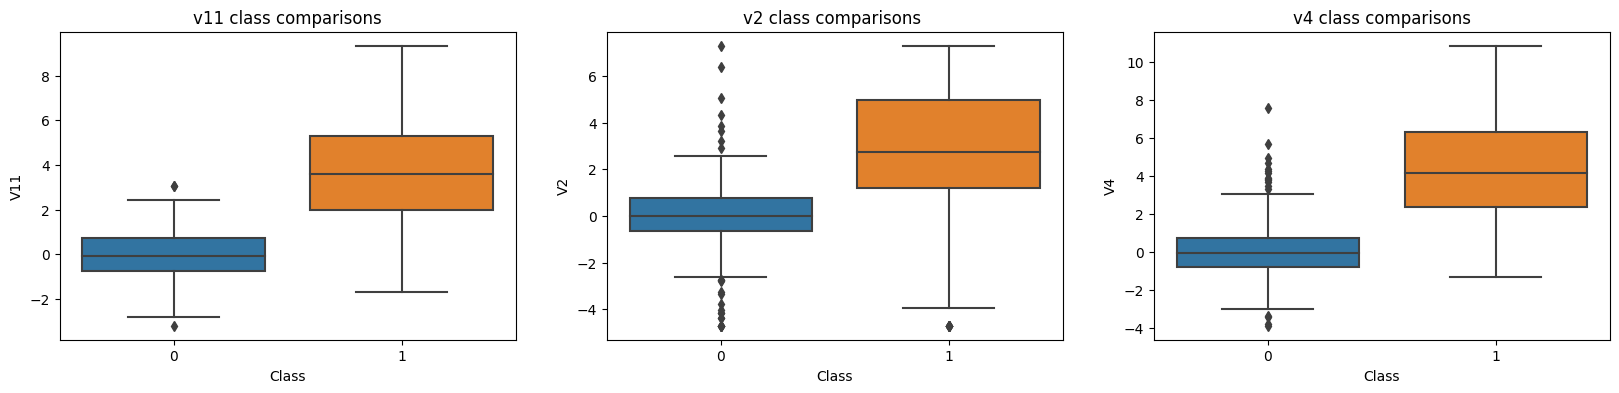

In [29]:
fig, axes = plt.subplots(1,3 ,figsize=(20,4))
axes[0].set_title("v11 class comparisons")
axes[1].set_title("v2 class comparisons ")
axes[2].set_title("v4 class comparisons")
sns.boxplot(x="Class", y="V11", data=new_df,   ax=axes[0])
sns.boxplot(x="Class", y="V2", data=new_df,   ax=axes[1])
sns.boxplot(x="Class", y="V4", data=new_df,   ax=axes[2])

In [30]:
X = new_df.drop("Class",axis=1)
y = new_df["Class"]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=818)
# Turn the values into an array for classification algorithms.
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [33]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,GridSearchCV,cross_val_predict

In [34]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [35]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [36]:
log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, x_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, x_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.79%
Knears Neighbors Cross Validation Score 93.77%
Support Vector Classifier Cross Validation Score 94.67%
DecisionTree Classifier Cross Validation Score 92.25%


In [37]:
log_reg_pred = cross_val_predict(log_reg, x_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, x_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, x_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, x_train, y_train, cv=5)

In [38]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9769359943163469
KNears Neighbors:  0.9381063101466124
Support Vector Classifier:  0.9781179358005555
Decision Tree Classifier:  0.9228799328295549


In [39]:
print(classification_report(y_test,log_reg.predict(x_test)))
print(classification_report(y_test,knears_neighbors.predict(x_test)))
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       102
           1       0.97      0.89      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       102
           1       0.98      0.88      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       102
           1       0.97      0.91      0.93        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [40]:
!pip install keras

In [44]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs =x_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
undersample_model.summary()

In [47]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
undersample_model.fit(x_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


I0000 00:00:1715862016.192498     225 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 - 4s - 167ms/step - accuracy: 0.6693 - loss: 0.6268 - val_accuracy: 0.8481 - val_loss: 0.3767
Epoch 2/20
26/26 - 0s - 3ms/step - accuracy: 0.8824 - loss: 0.3283 - val_accuracy: 0.9241 - val_loss: 0.2750
Epoch 3/20
26/26 - 0s - 3ms/step - accuracy: 0.9221 - loss: 0.2530 - val_accuracy: 0.9367 - val_loss: 0.2187
Epoch 4/20
26/26 - 0s - 3ms/step - accuracy: 0.9269 - loss: 0.2119 - val_accuracy: 0.9430 - val_loss: 0.1867
Epoch 5/20
26/26 - 0s - 3ms/step - accuracy: 0.9285 - loss: 0.1868 - val_accuracy: 0.9430 - val_loss: 0.1666
Epoch 6/20
26/26 - 0s - 3ms/step - accuracy: 0.9316 - loss: 0.1694 - val_accuracy: 0.9430 - val_loss: 0.1529
Epoch 7/20
26/26 - 0s - 3ms/step - accuracy: 0.9380 - loss: 0.1576 - val_accuracy: 0.9367 - val_loss: 0.1489
Epoch 8/20
26/26 - 0s - 3ms/step - accuracy: 0.9412 - loss: 0.1474 - val_accuracy: 0.9367 - val_loss: 0.1435
Epoch 9/20
26/26 - 0s - 3ms/step - accuracy: 0.9428 - loss: 0.1399 - val_accuracy: 0.9367 - val_loss: 0.1392
Epoch 10/20
26/26 - 0s - 3ms

In [55]:
undersample_model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9435 - loss: 0.1337 


[0.15406399965286255, 0.9340101480484009]